In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

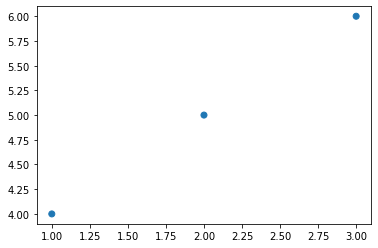

In [2]:
fig = plt.figure()
s = plt.scatter([1, 2, 3], [4, 5, 6])
s.set_urls(['https://www.bbc.com/news', 'https://www.google.com/', None])
fig.savefig('scatter.svg')

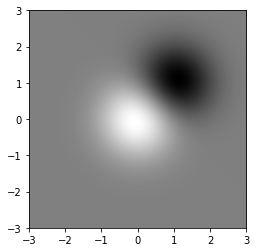

In [3]:
fig = plt.figure()
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.gray,
                origin='lower', extent=[-3, 3, -3, 3])

im.set_url('https://www.google.com/')
fig.savefig('image.svg')

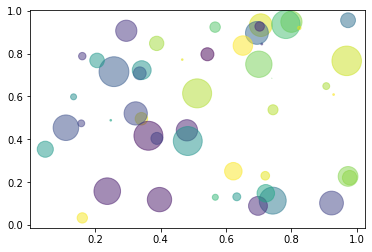

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

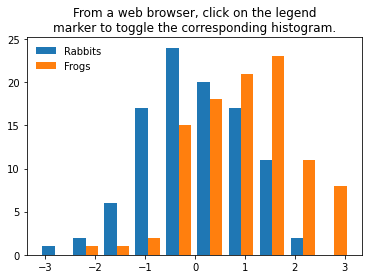

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from io import BytesIO
import json


plt.rcParams['svg.fonttype'] = 'none'

# Apparently, this `register_namespace` method is necessary to avoid garbling
# the XML namespace with ns0.
ET.register_namespace("", "http://www.w3.org/2000/svg")

# Fixing random state for reproducibility
np.random.seed(19680801)

# --- Create histogram, legend and title ---
plt.figure()
r = np.random.randn(100)
r1 = r + 1
labels = ['Rabbits', 'Frogs']
H = plt.hist([r, r1], label=labels)
containers = H[-1]
leg = plt.legend(frameon=False)
plt.title("From a web browser, click on the legend\n"
          "marker to toggle the corresponding histogram.")


# --- Add ids to the svg objects we'll modify

hist_patches = {}
for ic, c in enumerate(containers):
    hist_patches['hist_%d' % ic] = []
    for il, element in enumerate(c):
        element.set_gid('hist_%d_patch_%d' % (ic, il))
        hist_patches['hist_%d' % ic].append('hist_%d_patch_%d' % (ic, il))

# Set ids for the legend patches
for i, t in enumerate(leg.get_patches()):
    t.set_gid('leg_patch_%d' % i)

# Set ids for the text patches
for i, t in enumerate(leg.get_texts()):
    t.set_gid('leg_text_%d' % i)

# Save SVG in a fake file object.
f = BytesIO()
plt.savefig(f, format="svg")

# Create XML tree from the SVG file.
tree, xmlid = ET.XMLID(f.getvalue())


# --- Add interactivity ---

# Add attributes to the patch objects.
for i, t in enumerate(leg.get_patches()):
    el = xmlid['leg_patch_%d' % i]
    el.set('cursor', 'pointer')
    el.set('onclick', "toggle_hist(this)")

# Add attributes to the text objects.
for i, t in enumerate(leg.get_texts()):
    el = xmlid['leg_text_%d' % i]
    el.set('cursor', 'pointer')
    el.set('onclick', "toggle_hist(this)")

# Create script defining the function `toggle_hist`.
# We create a global variable `container` that stores the patches id
# belonging to each histogram. Then a function "toggle_element" sets the
# visibility attribute of all patches of each histogram and the opacity
# of the marker itself.

script = """
<script type="text/ecmascript">
<![CDATA[
var container = %s

function toggle(oid, attribute, values) {
    /* Toggle the style attribute of an object between two values.

    Parameters
    ----------
    oid : str
      Object identifier.
    attribute : str
      Name of style attribute.
    values : [on state, off state]
      The two values that are switched between.
    */
    var obj = document.getElementById(oid);
    var a = obj.style[attribute];

    a = (a == values[0] || a == "") ? values[1] : values[0];
    obj.style[attribute] = a;
    }

function toggle_hist(obj) {

    var num = obj.id.slice(-1);

    toggle('leg_patch_' + num, 'opacity', [1, 0.3]);
    toggle('leg_text_' + num, 'opacity', [1, 0.5]);

    var names = container['hist_'+num]

    for (var i=0; i < names.length; i++) {
        toggle(names[i], 'opacity', [1, 0])
    };
    }
]]>
</script>
""" % json.dumps(hist_patches)

# Add a transition effect
css = tree.find('.//{http://www.w3.org/2000/svg}style')
css.text = css.text + "g {-webkit-transition:opacity 0.4s ease-out;" + \
    "-moz-transition:opacity 0.4s ease-out;}"

# Insert the script and save to file.
tree.insert(0, ET.XML(script))

ET.ElementTree(tree).write("svg_histogram.svg")

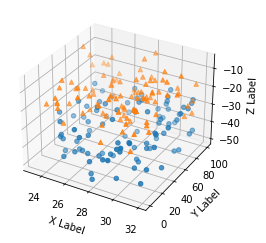

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

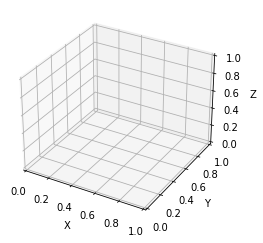

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = mpl.colormaps['viridis'].resampled(8)  # type: ignore 

AttributeError: 'ListedColormap' object has no attribute 'resampled'

In [9]:
print(viridis(0.56))

NameError: name 'viridis' is not defined